In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir
from tensorflow.keras import callbacks

In [2]:
train_dir = 'kitchen/trainpreview3'
train_imgs = ['kitchen/trainpreview3/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'kitchen/test'
test_imgs = ['kitchen/test/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

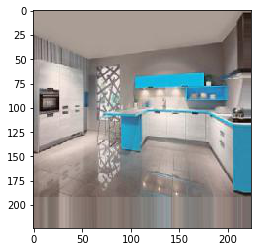

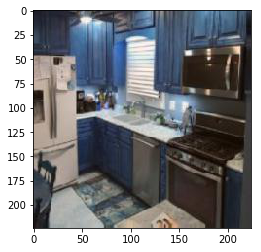

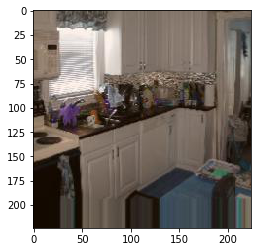

In [4]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [3]:
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
import pandas as pd

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg16 import decode_predictions

In [4]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(26883, 224, 224, 3)
<class 'numpy.ndarray'>
(117, 224, 224, 3)


In [10]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns one array
   
    #y is an array of labels
   
    y = [] # labels
    for image in list_of_images:
       
    
        if 'new' in image:
            y.append(1)
        elif 'old' in image:
            y.append(0)
    return y

In [11]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)


26883
<class 'list'>
26883
<class 'numpy.ndarray'>
(26883,)
<class 'numpy.ndarray'>
(26883, 2)
117
<class 'list'>
117
<class 'numpy.ndarray'>
(117,)
<class 'numpy.ndarray'>
(117, 2)


# VGG16_MODEL1

In [5]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)



(26883, 7, 7, 512)


In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [26]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.025, random_state=42)
print(len(X_train))
print(X_train.shape)

26210
(26210, 25088)


In [27]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
#tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)
model.add(Dense(units=2))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 


#history = model.fit(X_train, Y_train, epochs=6, batch_size=128,validation_data=(X_valid,Y_valid))


es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
history = model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid),callbacks=[es_callback])

Train on 26210 samples, validate on 673 samples
Epoch 1/20
26210/26210 [==============================] - 33s 1ms/sample - loss: 0.3568 - accuracy: 0.8493 - val_loss: 0.2164 - val_accuracy: 0.9138
Epoch 2/20
26210/26210 [==============================] - 33s 1ms/sample - loss: 0.1897 - accuracy: 0.9319 - val_loss: 0.1830 - val_accuracy: 0.9316
Epoch 3/20
26210/26210 [==============================] - 32s 1ms/sample - loss: 0.1746 - accuracy: 0.9333 - val_loss: 0.1866 - val_accuracy: 0.9272


In [30]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation
from tensorflow.keras.optimizers import SGD
model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(units=2))
model.add(Activation('softmax'))
#model.add(Activation('sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# fitting the model 

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, Y_train, epochs=50, batch_size=128,validation_data=(X_valid,Y_valid),callbacks=[es_callback])
#history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_valid,Y_valid))

Train on 26210 samples, validate on 673 samples
Epoch 1/50
26210/26210 [==============================] - 30s 1ms/sample - loss: 0.6547 - accuracy: 0.6240 - val_loss: 0.5970 - val_accuracy: 0.7117
Epoch 2/50
26210/26210 [==============================] - 30s 1ms/sample - loss: 0.5348 - accuracy: 0.7856 - val_loss: 0.4724 - val_accuracy: 0.8098
Epoch 3/50
26210/26210 [==============================] - 30s 1ms/sample - loss: 0.4235 - accuracy: 0.8386 - val_loss: 0.3866 - val_accuracy: 0.8559
Epoch 4/50
26210/26210 [==============================] - 30s 1ms/sample - loss: 0.3417 - accuracy: 0.8714 - val_loss: 0.3395 - val_accuracy: 0.8603
Epoch 5/50
26210/26210 [==============================] - 30s 1ms/sample - loss: 0.2819 - accuracy: 0.8979 - val_loss: 0.3058 - val_accuracy: 0.8886
Epoch 6/50
26210/26210 [==============================] - 30s 1ms/sample - loss: 0.2348 - accuracy: 0.9180 - val_loss: 0.2834 - val_accuracy: 0.8930
Epoch 7/50
26210/26210 [==============================] - 

In [22]:
#save the model 
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')


<Figure size 432x288 with 0 Axes>

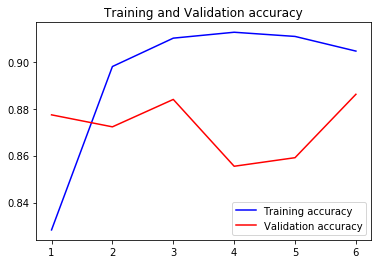

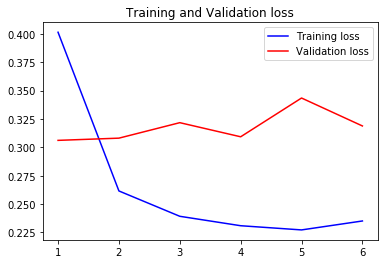

<Figure size 432x288 with 0 Axes>

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()




In [23]:
pred_y=model.predict(test_x)


print(test_y.shape)

print(pred_y.shape)


(117, 2)
(117, 2)


In [26]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)

Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)


Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)

(117, 2)
(117, 2)
(117,)
<class 'numpy.ndarray'>
[0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 0 0]


In [27]:
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)




<class 'list'>
(117,)
<class 'numpy.ndarray'>
[0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 0 0]


0.9316239316239316

In [31]:
pred_y=model.predict(test_x)
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)



<class 'list'>
(117,)
<class 'numpy.ndarray'>
[1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1
 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1
 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 1 1]
<class 'list'>
(117,)
<class 'numpy.ndarray'>
[1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 0 1]


0.8632478632478633

0.9145299145299145 16

0.8974358974358975 16

batchsize =16,0.889

0.8974358974358975, 8

batchsize=8,0.889

0.9316239316239316 batchsize=4, batch_size=128

0.9145299145299145 batchsize=4

0.905982905982906,batchsize =1 


0.8974358974358975,batchsize=1

0.8803418803418803,batchsize=1

0.8632478632478633，batchsize = 1

In [ ]:
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[51,  4],
       [ 7, 55]])

In [ ]:
import matplotlib.image as mpimg
i = 0 
j=0
text_labels = []
pred_labels = []
for ima in test_imgs:
    
    if(Y_test[i]!=Y_pred[i]):
        
        img = mpimg.imread(ima)
        if Y_test[i] > 0.5:
            text_labels.append('new')
            print(i)
        else:
            text_labels.append('old')
        if Y_pred[i] > 0.5:
            pred_labels.append('new')
        else:
            pred_labels.append('old')
        
        
        plt.title('Test is  ' + text_labels[j] + 'Pred is '+ pred_labels[j])
        imgplot = plt.imshow(img)
        j+=1
        plt.show()
    i+=1
print(j)

# Data Augumenation 1

In [31]:
train_dir = 'kitchen/trainpreivew1'
train_imgs = ['kitchen/trainpreivew1/{}'.format(i) for i in os.listdir(train_dir)]

test_dir = 'kitchen/test'
test_imgs = ['kitchen/test/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

In [32]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

<class 'numpy.ndarray'>
(6859, 224, 224, 3)


In [33]:
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(117, 224, 224, 3)


In [34]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)

6859
<class 'list'>
6859
<class 'numpy.ndarray'>
(6859,)
<class 'numpy.ndarray'>
(6859, 2)
117
<class 'list'>
117
<class 'numpy.ndarray'>
(117,)
<class 'numpy.ndarray'>
(117, 2)


In [29]:
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)

117
<class 'list'>
117
<class 'numpy.ndarray'>
(117,)
<class 'numpy.ndarray'>
(117, 2)


In [35]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
feature_test = model.predict(test_img)
print(features_train.shape)



(6859, 7, 7, 512)


In [36]:
train_x=features_train.reshape(length_train,25088)
test_x = feature_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.2, random_state=42)
print(len(X_train))
print(X_train.shape)

5487
(5487, 25088)


In [37]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=2))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 


history = model.fit(X_train, Y_train, epochs=9, batch_size=256,validation_data=(X_valid,Y_valid))

Train on 5487 samples, validate on 1372 samples
Epoch 1/9
5487/5487 [==============================] - 6s 1ms/sample - loss: 0.6799 - accuracy: 0.6293 - val_loss: 0.5284 - val_accuracy: 0.8069
Epoch 2/9
5487/5487 [==============================] - 4s 735us/sample - loss: 0.3939 - accuracy: 0.8555 - val_loss: 0.3375 - val_accuracy: 0.8666
Epoch 3/9
5487/5487 [==============================] - 4s 730us/sample - loss: 0.2414 - accuracy: 0.9160 - val_loss: 0.2792 - val_accuracy: 0.8863
Epoch 4/9
5487/5487 [==============================] - 4s 745us/sample - loss: 0.1379 - accuracy: 0.9603 - val_loss: 0.2434 - val_accuracy: 0.9038
Epoch 5/9
5487/5487 [==============================] - 4s 773us/sample - loss: 0.0897 - accuracy: 0.9779 - val_loss: 0.2420 - val_accuracy: 0.9038
Epoch 6/9
5487/5487 [==============================] - 4s 769us/sample - loss: 0.0539 - accuracy: 0.9892 - val_loss: 0.2471 - val_accuracy: 0.9082
Epoch 7/9
5487/5487 [==============================] - 5s 849us/sample -

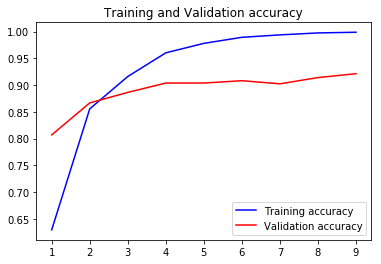

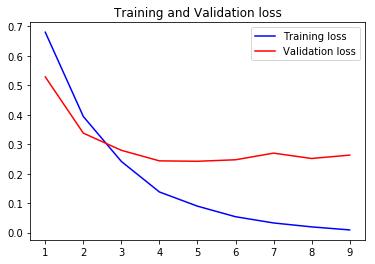

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()



#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

120
<class 'list'>
120
<class 'numpy.ndarray'>
(120,)
<class 'numpy.ndarray'>
(120, 2)


In [40]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)



(117, 2)
(117, 2)


In [41]:
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

<class 'list'>
(117,)
<class 'numpy.ndarray'>
[1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 0 0]
<class 'list'>
(117,)
<class 'numpy.ndarray'>
[0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1
 1 1 1 1 0 0]


0.8717948717948718

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[47,  8],
       [ 3, 59]])

27


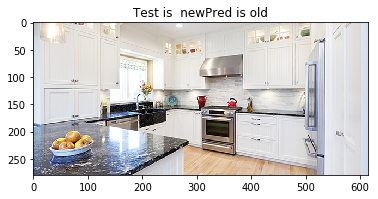

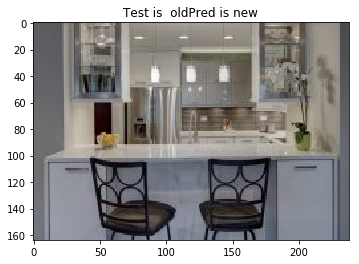

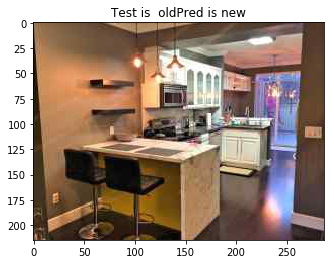

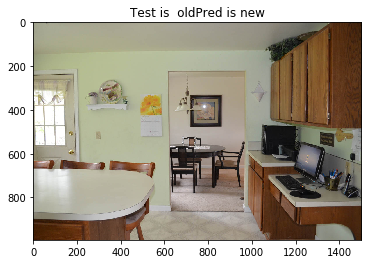

37


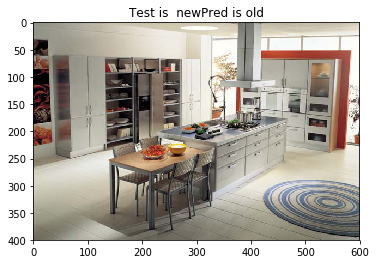

40


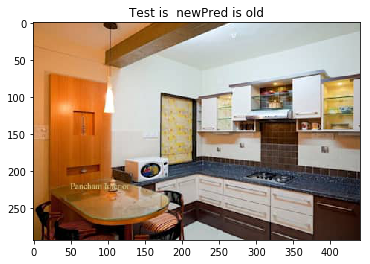

43


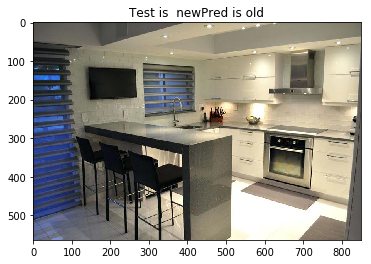

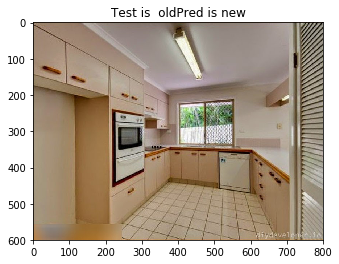

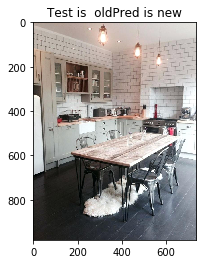

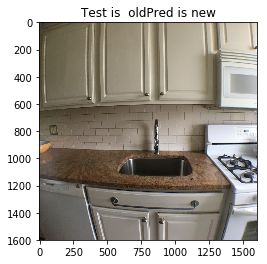

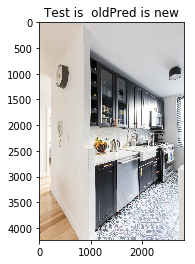

108


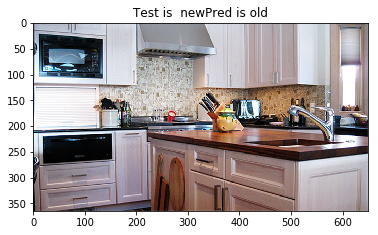

12


In [31]:
import matplotlib.image as mpimg
i = 0 
j=0
text_labels = []
pred_labels = []
for ima in test_imgs:
    
    if(Y_test[i]!=Y_pred[i]):
        
        img = mpimg.imread(ima)
        if Y_test[i] > 0.5:
            text_labels.append('new')
            print(i)
        else:
            text_labels.append('old')
        if Y_pred[i] > 0.5:
            pred_labels.append('new')
        else:
            pred_labels.append('old')
        
        
        plt.title('Test is  ' + text_labels[j] + 'Pred is '+ pred_labels[j])
        imgplot = plt.imshow(img)
        j+=1
        plt.show()
    i+=1
print(j)